In [1]:
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
np.random.seed(1234)
from sklearn.linear_model import LogisticRegression
from random import choice
import scipy
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from math import log
import numpy as np
from typing import AsyncContextManager

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
     categories=categories, shuffle=True, random_state=42,remove=(['headers', 'footers', 'quotes']))
twenty_test = fetch_20newsgroups(subset='test',
     categories=categories, shuffle=True, random_state=42,remove=(['headers', 'footers', 'quotes']))
twenty_train.target_names
#len(twenty_train.data)
#print("\n".join(twenty_train.data[0].split("\n")[:3]))
print(twenty_train.target.shape)
print(twenty_train.data)

(2257,)
['Does anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.', "Hi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the problem:\n\tI have a rectangular mesh in the uv domain, i.e  the mesh is a \n\tmapping of a 3d Bezier patch into 2d. The area in this domain\n\twhich is inside a trimming loop had to be rendered. The trimming\n\tloop is a set of 2d Bezier curve segments.\n\tFor the sake of notation: the mesh is made up of cells.\n\n\tMy problem is this :\n\tThe trimming area has to be split up into individual smaller\n\tcells bounded by the trimming curve segments. If a cell\n\tis wholly inside the area...then it is output as a whole ,\n\telse it is trivially rejected. \n\n\tDoes any body know how thiss can b

Convert text data to vectors

In [3]:

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(twenty_train.data)
Y_train_counts = count_vect.transform(twenty_test.data)
X_train_counts.shape
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer()
tf_transformer.fit(twenty_train.data)
X_train_tf = tf_transformer.fit_transform(twenty_train.data)
print(X_train_tf.shape)
X_test_tf = tf_transformer.transform(twenty_test.data)
print(X_test_tf.shape)

(num_instances, num_features)=X_train_tf.shape
loss = lambda y, yh: np.mean((y-yh)**2)





#inds = np.random.permutation(num_instances)
#n_test = num_instances // 5
#x_train, y_train = X_train_tf[inds[n_test:]], twenty_train.target[inds[n_test:]]
#x_test, y_test = X_train_tf[inds[:n_test]], twenty_train.target[inds[:n_test]]
word_size = len(count_vect.vocabulary_)
#print(word_size)

(2257, 28865)
(1502, 28865)


In [4]:
count_vect = CountVectorizer()
X_test_counts = count_vect.fit_transform(twenty_test.data)
print(X_test_counts.shape)
from sklearn.feature_extraction.text import TfidfVectorizer
#tf_transformer = TfidfVectorizer()
#X_test_tf = tf_transformer.transform(twenty_test.data)
#print(X_test_tf.shape)
#x_test, y_test=X_test_tf, twenty_test.target

(1502, 25613)


Model Selection

In [5]:

def cross_validation_split(x_train,y_train,n, n_folds=5): #n is the matrix
    #get the number of data samples in each split
    n_val = n // n_folds
    folds = []
    for f in range(n_folds):
      start = n // 5 * f
      end = n // 5 * (f+1)
      x_train_new = x_train[start:end]
      y_train_new = y_train[start:end]
      try:
        x_valid = sparse.vstack((x_train[:start],x_train[end:]))
      except:
        x_valid = np.append(x_train[:start],x_train[end:])
        #print(x_valid)
      y_valid = np.append(y_train[:start],y_train[end:])
      folds.append([x_train_new,x_valid,y_train_new,y_valid])
    return folds


In [6]:
num_folds = 5

In [ ]:
# err_test, err_valid = np.zeros(len(hyperparameter list), num_folds), np.zeros((len(hyperparameterlist), num_folds))
# accuracy =np.zeros(len(hyperparameter list), num_folds)

In [7]:
def evaluate_acc(y_test,y_pred):
  return np.sum(y_pred == y_test)/y_test.shape[0]

In [8]:

def kfoldCV(n,x_train, y_train, model):
    accuracy = []
    for combo in cross_validation_split(x_train,y_train,n, n_folds=5):
        #Bulid model here (create a regression model here, call in model)
        model.fit(combo[0], combo[2])
        #err_valid[i, f] = loss(y_rest[val], model.predict(x_train_split[val]))
        test_return=model.predict(combo[1])
        accuracy.append(evaluate_acc(combo[3],test_return))
        #print(accuracy[i, f])
        #err_test[i, f]= loss(y_test, model.predict(x_test))
        #print(err_valid[i, f])
        #print(err_test[i, f])
    return sum(accuracy)/len(accuracy)
#kfoldCV(X_train_tf.shape[0],X_train_tf,twenty_train.target,LogisticRegression(solver='saga',multi_class='ovr',max_iter=1000,penalty='l1'))

In [9]:

class MultiNomialNaiveBayes:
    def __init__(self, alpha=0.001):
        self.alpha = alpha


    def fit(self, x, y):
        self.x = x # list of category lists
        self.y = y  # list of output values
        # self.IDF = False
        C = np.max(y) + 1
        self.C = C  # number of categories e.g 0/1 0/1/2
        # This can be found in NaiveBayes.get_data_20newsgroups()
        self.size_vocab = word_size  # ? number of words in rows
        self.total_wc_for_class, self.wc = Counter(), Counter()  # total word count in all documents labelled c, counts of word d in all documents labelled c
        categoryCounter = [0 for _ in range(C)]  # number of instances in class c , create a list with c [0,0,0,0,0] with size C
        for i, (features, label) in enumerate(zip(x, y)):
            for wrd, freq in features.items():  # feature is dictionary ,feature.items() is list of tuples,key: wrd ,value: freq
                self.wc[wrd, label] += freq  # (wrd,label) becomes the new key
                self.total_wc_for_class[label] += freq
            categoryCounter[label] += 1  # each index represents the category of y,the corresponding value to index is the frequency of category
        self.Nc = np.array(categoryCounter)
        self.probability_class = np.zeros(C)  # ?
        # C -> largest category number plus 1
        self.probability_class = np.array([categoryCounter[c] for c in range(C)]) / len(self.y)  # compute the prior probability for each category
        self.word_prob_in_class = dict()

        self.word_prob_in_class = {(wrd, c): (self.wc[wrd, c] + self.alpha) / (self.total_wc_for_class[c] + self.alpha * self.size_vocab)for c in range(self.C) for wrd in range(self.size_vocab)}

    def predict(self, x_test):
        return np.array([self.process_tmp_cnt(x).index(max(self.process_tmp_cnt(x)))for x in x_test])

    def process_tmp_cnt(self, tmp_cnt):
        res = []
        for c in range(self.C):
            res.append(log(self.probability_class[c]))
            for wrd, freq in tmp_cnt.items():
                p = self.word_prob_in_class[wrd, c]
                res[-1] += freq * log(p)
        return res

In [10]:
def logisRegression():
  mx_iters = []
  loss_fn = []
  classes = []
  accuracy = []
  for i in range(100):
    classes.append(choice(['multinomial', 'ovr']))
    loss_fn.append(choice(['l1', 'l2']))
    mx_iters.append(np.random.randint(1000, 2000))

  models = [LogisticRegression(solver='saga',multi_class=cls,max_iter=itr,penalty=ls_fn) for cls,itr, ls_fn in zip(classes,mx_iters, loss_fn)]
  #accuracy = np.zeros((len(models), num_folds))
  for i in range(len(models)):
    acc = kfoldCV(X_train_tf.shape[0], X_train_tf, twenty_train.target, models[i])
    accuracy.append(acc)
    print(acc)
  val = max(accuracy)
  idx = accuracy.index(val)
  print(idx)
  print(models[idx])
  models[idx].fit(X_train_tf,twenty_train.target)
  test_return = models[idx].predict(X_test_tf)
  return evaluate_acc(twenty_test.target,test_return)
  
logisRegression()

0.5615725359911407
0.7147286821705425
0.7358803986710963
0.7346622369878183
0.5619047619047619
0.5666666666666667
0.5663344407530454
0.7149501661129568
0.7153931339977853
0.7343300110741972
0.7355481727574751
0.735437430786268
0.7344407530454042
0.5616832779623477
0.5617940199335548
0.5616832779623476
0.7348837209302326
0.7152823920265782
0.5622369878183833
0.7346622369878183
0.7348837209302326
0.7347729789590256
0.7155038759689922
0.715171650055371
0.5664451827242525
0.7157253599114064
0.5617940199335548
0.5617940199335548
0.7349944629014397
0.5663344407530454
0.7148394241417497
0.715171650055371
0.7152823920265781
0.5617940199335548
0.5662236987818383
0.5615725359911407
0.5620155038759689
0.7149501661129569
0.7146179401993356
0.5613510520487266
0.7353266888150609
0.7349944629014397
0.5666666666666667
0.5619047619047619
0.5617940199335548
0.5666666666666667
0.7155038759689922
0.5663344407530454
0.7349944629014395
0.5666666666666667
0.5617940199335548
0.7349944629014397
0.7352159468438

0.7836218375499334

In [11]:
from collections import Counter
def process_NB_data(x, y):
    tmp = scipy.sparse.coo_matrix(x)
    lst = [Counter() for _ in range(len(y))]
    for doc_idx, wrd, freq in zip(tmp.row, tmp.col, tmp.data):
        lst[doc_idx][wrd] += freq
    return lst

In [15]:
def naivebayes():
  x_tr = process_NB_data(X_train_tf, twenty_train.target)
  x_te = process_NB_data(X_test_tf, twenty_test.target)
  A = []
  for i in range(1,101):
    al = i / 100
    #print(al)
    A.append(al)
  models = [MultiNomialNaiveBayes(alpha = al) for al in A]
  accuracy = []
  for i in range(len(models)):
    acc = kfoldCV(len(x_tr), x_tr, twenty_train.target, models[i])
    accuracy.append(acc)
    print(acc)
  val = max(accuracy)
  idx = accuracy.index(val)
  print(A[idx])
  models[idx].fit(x_tr,twenty_train.target)
  test_return = models[idx].predict(x_te)
  return evaluate_acc(twenty_test.target,test_return)
naivebayes()


0.8232558139534885
0.8120708748615726
0.7977851605758582
0.7869324473975637
0.7754152823920266
0.7668881506090809
0.7588039867109635
0.748062015503876
0.7409745293466223
0.7339977851605759
0.7262458471760798
0.72015503875969
0.7163898117386489
0.7116279069767442
0.7060908084163897
0.7
0.6957918050941306
0.6906976744186046
0.6877076411960132
0.6841638981173865
0.6806201550387596
0.6772978959025471
0.6724252491694351
0.6694352159468439
0.6654485049833887
0.6627906976744186
0.6594684385382059
0.6564784053156145
0.6542635658914728
0.6521594684385382
0.6490586932447397
0.6473975636766335
0.64562569213732
0.6435215946843853
0.6408637873754153
0.6387596899224807
0.6363233665559246
0.6339977851605758
0.63156146179402
0.6292358803986711
0.6267995570321151
0.6249169435215947
0.6229235880398671
0.6210409745293466
0.6186046511627907
0.6170542635658915
0.6155038759689923
0.6137320044296788
0.6121816168327796
0.6099667774086379
0.6081949058693245
0.6067552602436322
0.6050941306755261
0.6027685492801

0.8375499334221038

Text(0, 0.5, 'accuarcy of the model')

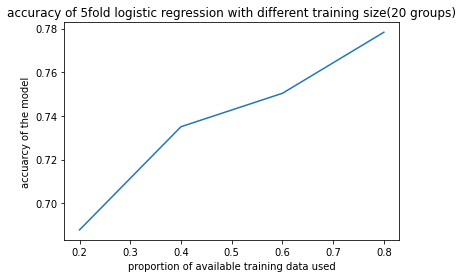

In [17]:
def training_with_different_proportions(x_train, y_train, x_test, y_test, model, ratio):
  length = len(y_train)
  end_idx = int(length * ratio)
  x_train = x_train[:end_idx]
  y_train = y_train[:end_idx]
  model.fit(x_train,y_train)
  test_return = model.predict(x_test)
  return evaluate_acc(y_test, test_return)


acc_list = []

for ratio in range(2, 10, 2):
  ratio = ratio / 10
  acc_list.append(training_with_different_proportions(X_train_tf, twenty_train.target, X_test_tf, twenty_test.target, LogisticRegression(max_iter=1986, multi_class='multinomial', solver='saga'), ratio))
 
xAxis = [0.2, 0.4, 0.6, 0.8]
plt.plot(xAxis,acc_list)
plt.title('accuracy of 5fold logistic regression with different training size(20 groups)')
plt.xlabel('proportion of available training data used')
plt.ylabel('accuarcy of the model')



Text(0, 0.5, 'accuarcy of the model')

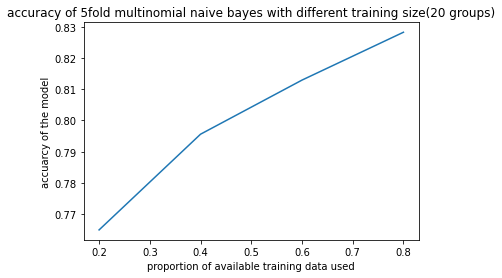

In [18]:
x_tr = process_NB_data(X_train_tf, twenty_train.target)
x_te = process_NB_data(X_test_tf, twenty_test.target)
acc_list_1 = []
for ratio in range(2, 10, 2):
  ratio = ratio / 10
  acc_list_1.append(training_with_different_proportions(x_tr, twenty_train.target, x_te, twenty_test.target, MultiNomialNaiveBayes(alpha = 0.01), ratio))
  
xAxis = [0.2, 0.4, 0.6, 0.8]
plt.plot(xAxis,acc_list_1)
plt.title('accuracy of 5fold multinomial naive bayes with different training size(20 groups)')
plt.xlabel('proportion of available training data used')
plt.ylabel('accuarcy of the model')